# Time Series Forecasting for Future Sales
---
**Submitted by: Sheetal Bongale | March 2021**

Steps -
1. Data Wrangling and Exploratory Data Analysis
2. Feature Engineering and Selection
3. **Modeling and forecasting**
4. **Model evaluation and validation**
5. **Sales quantity forecast results and visualization**
6. Final results and analysis report

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

pio.renderers
pio.renderers.default='notebook+jupyterlab'
plotly.offline.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/top_selling_data.csv", encoding= 'unicode_escape')
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Quarter,Month,Week,Day,Weekday,Date,Total_Sales
0,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,13.92
1,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:17:00,0.29,17017.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,13.92
2,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,518.40
3,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2010-12-02 18:25:00,0.21,15093.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,60.48
4,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-03 10:26:00,0.29,13370.0,United Kingdom,2010,4,12,48,3,4,2010-12-03 00:00:00,13.92


In [3]:
df.shape

(672, 16)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df1 = df.loc[df['Description']=='WORLD WAR 2 GLIDERS ASSTD DESIGNS']
df1_sales = df1.groupby(['Date'])['Quantity'].sum().reset_index()
df1_sales

,Date,Quantity
0,2010-12-02,3264
1,2010-12-03,48
2,2010-12-05,96
3,2010-12-07,48
4,2010-12-08,240
...,...,...
220,2011-12-05,205
221,2011-12-06,240
222,2011-12-07,240
223,2011-12-08,336


In [6]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
model=ARIMA(df1_sales['Quantity'],order=(1,1,0))
model_fit=model.fit()

In [7]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Quantity   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1747.435
Method:                       css-mle   S.D. of innovations            590.862
Date:                Sun, 14 Mar 2021   AIC                           3500.870
Time:                        06:28:01   BIC                           3511.105
Sample:                             1   HQIC                          3505.002
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.4649     27.098     -0.349      0.727     -62.575      43.645
ar.L1.D.Quantity    -0.4592      0.063     -7.243      0.000      -0.583      -0.335
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1778           +0.0000j            2.1778            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

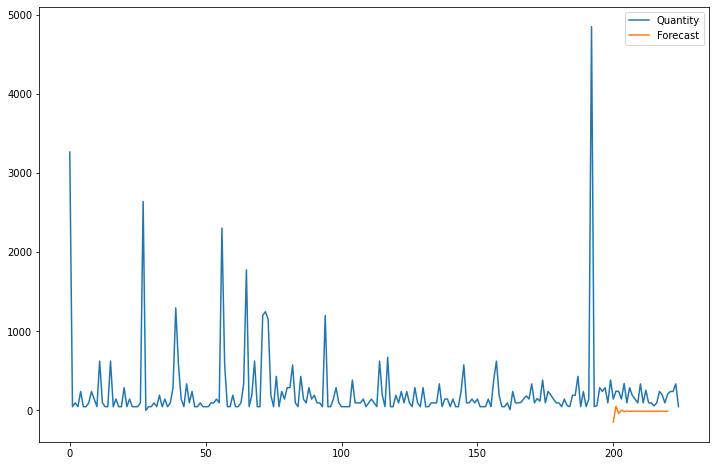

In [8]:
df1_sales['Forecast']=model_fit.predict(start=200,end=220,dynamic=True)
df1_sales[['Quantity','Forecast']].plot(figsize=(12,8))

In [9]:
model=sm.tsa.statespace.SARIMAX(df1_sales['Quantity'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

<AxesSubplot:>

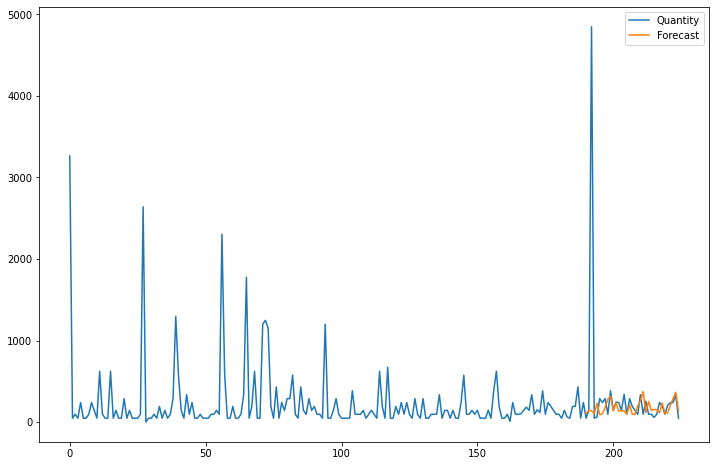

In [10]:
df1_sales['Forecast']=results.predict(start=190,end=230,dynamic=True)
df1_sales[['Quantity','Forecast']].plot(figsize=(12,8))

In [11]:
df1_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      225 non-null    datetime64[ns]
 1   Quantity  225 non-null    int64         
 2   Forecast  35 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.4 KB


In [12]:
df2 = df.loc[df['Description']=='MEDIUM CERAMIC TOP STORAGE JAR']
df2_sales = df1.groupby(['Date'])['Quantity'].sum().reset_index()
df2_sales

,Date,Quantity
0,2010-12-02,3264
1,2010-12-03,48
2,2010-12-05,96
3,2010-12-07,48
4,2010-12-08,240
...,...,...
220,2011-12-05,205
221,2011-12-06,240
222,2011-12-07,240
223,2011-12-08,336


In [20]:
model=sm.tsa.statespace.SARIMAX(df2_sales['Quantity'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

<AxesSubplot:>

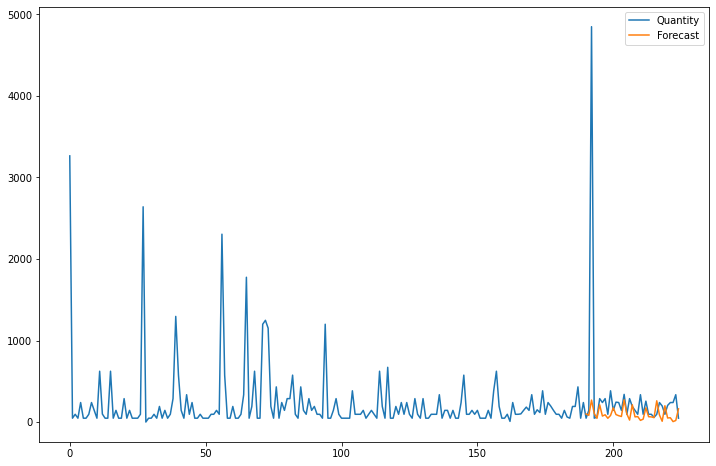

In [21]:
df2_sales['Forecast']=results.predict(start=190,end=230,dynamic=True)
df2_sales[['Quantity','Forecast']].plot(figsize=(12,8))

In [24]:
df2_sales.tail(15)

,Date,Quantity,Forecast
210,2011-11-21,336,21.212279
211,2011-11-22,96,36.499379
212,2011-11-23,257,175.161333
213,2011-11-25,96,66.252275
214,2011-11-27,96,64.109045
215,2011-11-28,58,55.191873
216,2011-11-29,96,261.327375
217,2011-11-30,240,86.936243
218,2011-12-01,198,10.455518
219,2011-12-02,96,200.772500
